C:\Users\DELL\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Total Reward: 26.0
Episode 50, Total Reward: 28.0
Episode 100, Total Reward: 13.0
Episode 150, Total Reward: 51.0
Episode 200, Total Reward: 34.0
Episode 250, Total Reward: 14.0
Episode 300, Total Reward: 44.0
Episode 350, Total Reward: 44.0
Episode 400, Total Reward: 10.0
Episode 450, Total Reward: 52.0


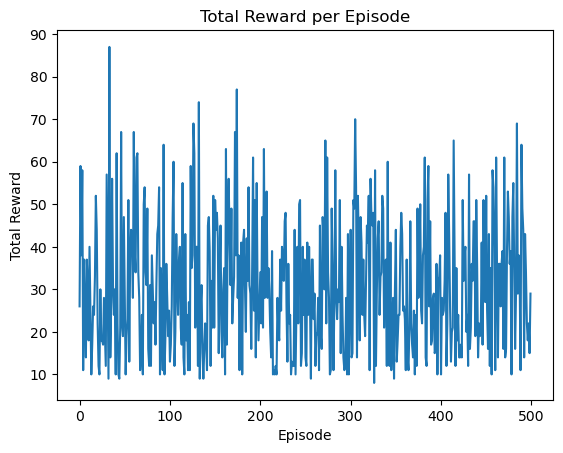

Total Reward during test: 53.0


In [2]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Initialize Q-table
state_space = (24, 24, 24, 24)  # discretize the state space into 24 bins for each state variable
action_space = env.action_space.n  # Number of actions (2: left or right)
q_table = np.random.uniform(low=-1, high=1, size=(state_space + (action_space,)))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.99
epsilon = 0.1
episodes = 500

# Helper function to discretize state space
def discretize_state(state):
    state_bins = [
        np.linspace(-2.4, 2.4, state_space[0]),  # Cart Position
        np.linspace(-3.0, 3.0, state_space[1]),  # Cart Velocity
        np.linspace(-0.5, 0.5, state_space[2]),  # Pole Angle
        np.linspace(-2.0, 2.0, state_space[3])   # Pole Velocity
    ]
    state_discretized = []
    for i, s in enumerate(state):
        state_discretized.append(np.digitize(s, state_bins[i]) - 1)
    return tuple(state_discretized)

# Training loop
reward_history = []
for episode in range(episodes):
    state, _ = env.reset()  # Unpack the returned dictionary to get the state
    state = discretize_state(state)
    total_reward = 0
    done = False

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(q_table[state])  # Exploit: best action from Q-table

        # Take action, observe reward and next state
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q-table
        q_table[state + (action,)] = (1 - learning_rate) * q_table[state + (action,)] + learning_rate * (reward + discount_factor * np.max(q_table[next_state]))

        state = next_state
        total_reward += reward

    reward_history.append(total_reward)
    if episode % 50 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

# Plot the training reward history
plt.plot(reward_history)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Test the agent
state, _ = env.reset()  # Unpack the returned dictionary
state = discretize_state(state)
done = False
total_reward = 0
while not done:
    action = np.argmax(q_table[state])  # Choose best action
    state, reward, done, _, _ = env.step(action)
    state = discretize_state(state)
    total_reward += reward

print(f"Total Reward during test: {total_reward}")
env.close()
